<h1> <centering> ECE 653 Final Project: Check Your Perturbations </centering> </h1>
<h3> By Joseph Scott, Laura Graves, and Vineel Nagisetty </h3>

In [1]:
# clone the repo if running on colab
import warnings
warnings.filterwarnings('ignore')

try:
    import google.colab
    !git clone https://github.com/vin-nag/checkYourPerturbations.git
    !pip install func_timeout
    %cd ./checkYourPerturbations/
    inColab = True
except:
    %cd ./../
    inColab = False

/home/vineel/PycharmProjects/cs858/checkYourPerturbations/src


In [2]:
# imports
from src.generator.factory import GeneratorSelector, GeneratorTypes
from src.benchmark import BenchmarkEnums, Benchmark
from src.evaluator import Evaluator

In [3]:
# load the generators
selector = GeneratorSelector()
generators = selector.getAllGenerators()

# view the different generators
for generator in generators:
    print(generator)

StepFuzz
NormFuzz
LaplaceFuzz


In [4]:
# load and view the benchmark
if inColab:
    %cd ./src/
benchmark = Benchmark(BenchmarkEnums.Demo)
benchmark.data.head(3)

,model,image,label
0,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",9
1,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",1
2,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",3


Results for: StepFuzz true label: 9, perturbed label: 4, time: 13.8251, similarity: 3.0281.


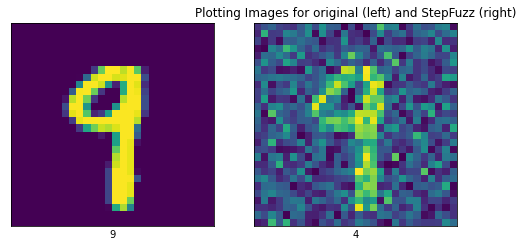

Results for: StepFuzz true label: 1 timed out.
Results for: StepFuzz true label: 3 timed out.
Results for: StepFuzz true label: 7, perturbed label: 8, time: 19.8743, similarity: 3.6632.


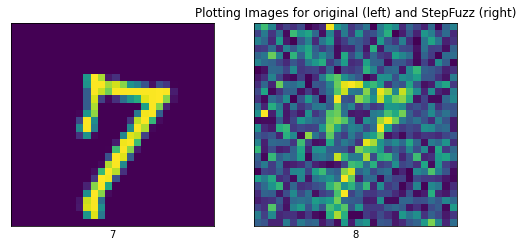

Results for: NormFuzz true label: 9, perturbed label: 4, time: 8.8885, similarity: 3.0856.


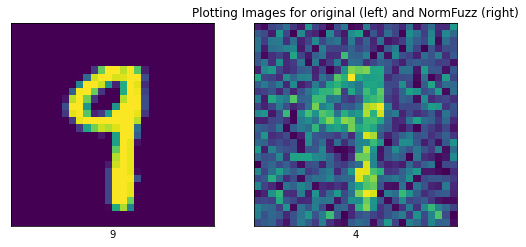

Results for: NormFuzz true label: 1, perturbed label: 8, time: 7.0968, similarity: 2.8799.


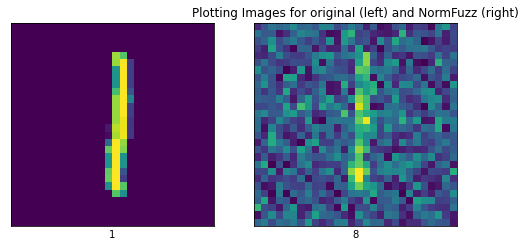

Results for: NormFuzz true label: 3 timed out.
Results for: NormFuzz true label: 7, perturbed label: 4, time: 16.3299, similarity: 3.8166.


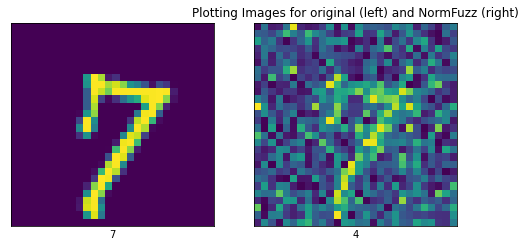

Results for: LaplaceFuzz true label: 9, perturbed label: 4, time: 1.9629, similarity: 2.2908.


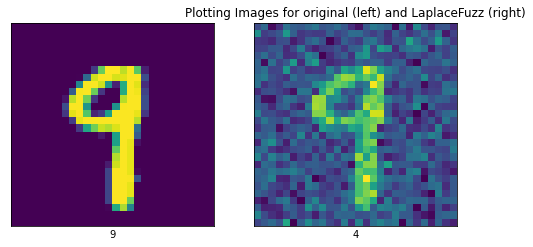

Results for: LaplaceFuzz true label: 1, perturbed label: 4, time: 4.4641, similarity: 3.1917.


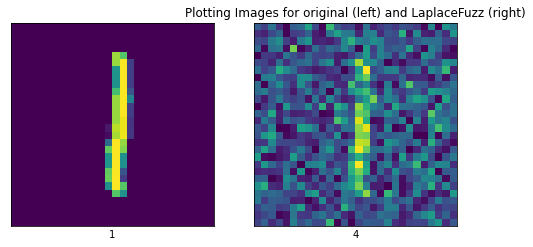

Results for: LaplaceFuzz true label: 3, perturbed label: 8, time: 20.2031, similarity: 5.5481.


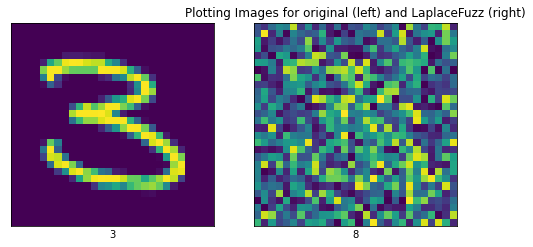

Results for: LaplaceFuzz true label: 7, perturbed label: 3, time: 9.6031, similarity: 4.2239.


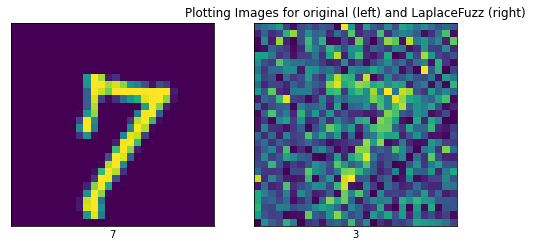

Completed Evaluation.


In [5]:
# perform evaluation
evaluator = Evaluator(benchmark=benchmark, generators=generators)
evaluator.evaluate(timeMax=25)